In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# import data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
# Calculate ratio of entries with missing feature
train_df.isnull().sum() / train_df.shape[0]

id                      0.000000
Decision                0.000000
Driving_to              0.000000
Passanger               0.000000
Weather                 0.000000
Temperature             0.000000
Time                    0.000000
Coupon                  0.000000
Coupon_validity         0.000000
Gender                  0.000000
Age                     0.000000
Maritalstatus           0.000000
Children                0.000000
Education               0.000000
Occupation              0.000000
Income                  0.000000
Bar                     0.009132
Coffeehouse             0.017871
Carryaway               0.012274
Restaurantlessthan20    0.010310
Restaurant20to50        0.014827
Direction_same          0.000000
Distance                0.000000
dtype: float64

Driving_to


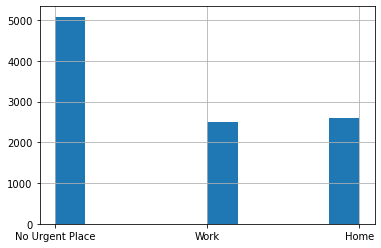

Passanger


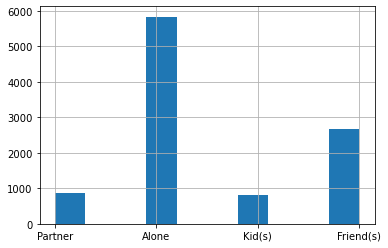

Weather


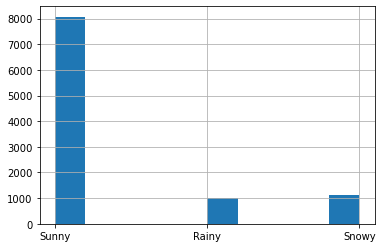

Temperature


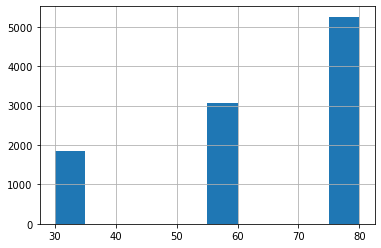

Time


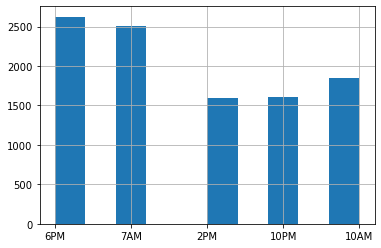

Coupon


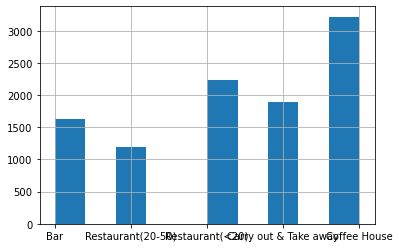

Coupon_validity


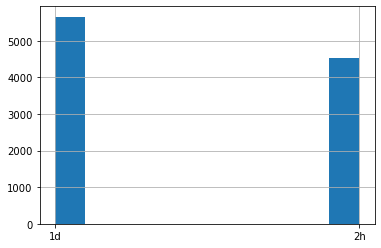

Gender


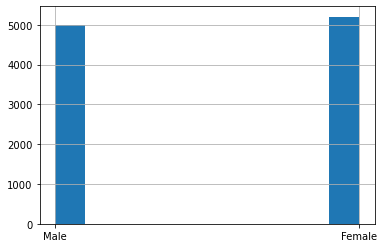

Age


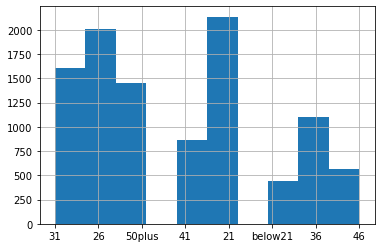

Maritalstatus


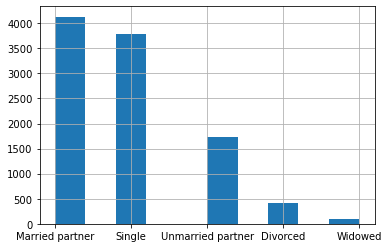

Children


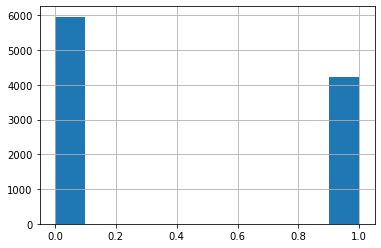

Education


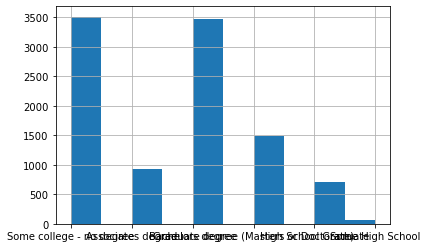

Occupation


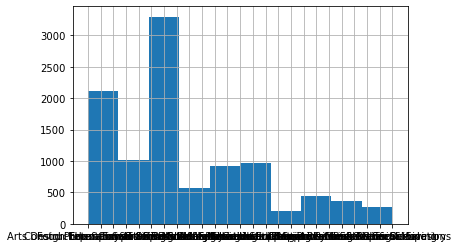

Income


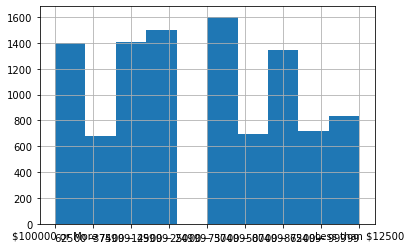

Bar


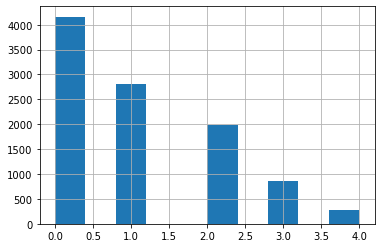

Coffeehouse


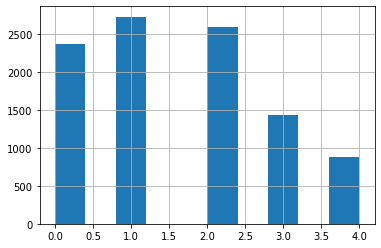

Carryaway


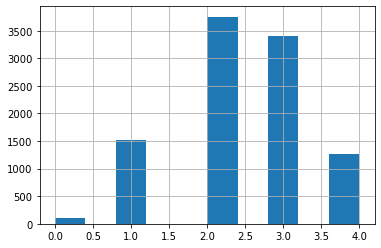

Restaurantlessthan20


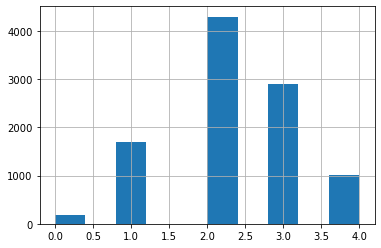

Restaurant20to50


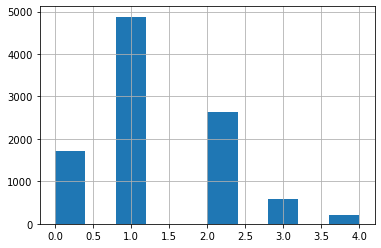

Direction_same


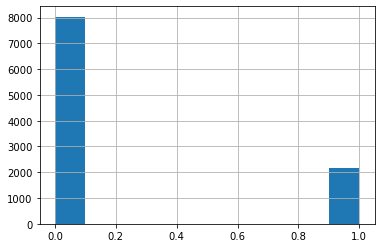

Distance


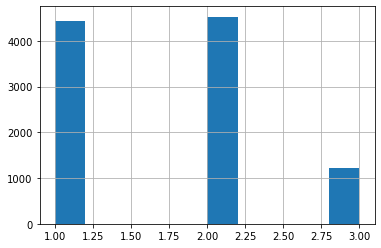

In [4]:
# Histogram each feature

for c in train_df.columns[2:]:
    print(c)
    train_df[c].hist()
    plt.show()

In [5]:
## Fill the empty values with mean values of this feature
features = ['Bar', 'Coffeehouse', 'Carryaway', 'Restaurantlessthan20', 'Restaurant20to50']

for f in features:
    ## calculate mean of this feature
    mean = train_df[f].mean()
    
    # fill with mean
    train_df[f] = train_df[f].fillna(mean)
    test_df[f] = test_df[f].fillna(mean)

In [6]:
# Convert all string features to numerical values

features= ['Driving_to', 'Passanger', 'Weather', 'Time', 'Coupon', 'Coupon_validity', 'Gender', 
           'Maritalstatus', 'Occupation']

for f in features:
    u = train_df[f].unique()
    
    dic = dict(zip(u,range(len(u))))
    train_df[f] = train_df[f].map(dic)
    test_df[f] = test_df[f].map(dic)

f = 'Age'

u = train_df[f].unique()
print(u)
# keep the order of the feature
dic = dict(zip(u,[3,2,7,5,1,0,4,6]))
train_df[f] = train_df[f].map(dic)
test_df[f] = test_df[f].map(dic)

f = 'Education'
u = train_df[f].unique()
print(u)
dic = dict(zip(u,[2,3,4,5,1,0]))
train_df[f] = train_df[f].map(dic)
test_df[f] = test_df[f].map(dic)

f = 'Income'
u = train_df[f].unique()
print(u)
dic = dict(zip(u,[8,5,3,1,2,6,4,7,0]))
train_df[f] = train_df[f].map(dic)
test_df[f] = test_df[f].map(dic)



['31' '26' '50plus' '41' '21' 'below21' '36' '46']
['Some college - no degree' 'Associates degree' 'Bachelors degree'
 'Graduate degree (Masters or Doctorate)' 'High School Graduate'
 'Some High School']
['$100000 or More' '$62500 - $74999' '$37500 - $49999' '$12500 - $24999'
 '$25000 - $37499' '$75000 - $87499' '$50000 - $62499' '$87500 - $99999'
 'Less than $12500']


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10184 entries, 0 to 10183
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10184 non-null  int64  
 1   Decision              10184 non-null  int64  
 2   Driving_to            10184 non-null  int64  
 3   Passanger             10184 non-null  int64  
 4   Weather               10184 non-null  int64  
 5   Temperature           10184 non-null  int64  
 6   Time                  10184 non-null  int64  
 7   Coupon                10184 non-null  int64  
 8   Coupon_validity       10184 non-null  int64  
 9   Gender                10184 non-null  int64  
 10  Age                   10184 non-null  int64  
 11  Maritalstatus         10184 non-null  int64  
 12  Children              10184 non-null  int64  
 13  Education             10184 non-null  int64  
 14  Occupation            10184 non-null  int64  
 15  Income             

In [8]:
X_train = train_df.drop("Decision", axis=1)
X_train = X_train.drop("id", axis=1)
y_train = train_df["Decision"]

X_test = test_df.drop("id", axis=1)

# Rescale the values in dataset to [0,1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
import timeit


# Train a decision tree model
dt = DecisionTreeClassifier()
start = timeit.default_timer()

# cross validation
scores = cross_val_score(dt, X_train, y_train, cv=10, scoring = "accuracy")

stop = timeit.default_timer()

print('Accuracy:', np.mean(scores))
print('Time: ', stop - start)  

Accuracy: 0.6732156800746523
Time:  0.3069040000000003


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest model
rfc = RandomForestClassifier() 
start = timeit.default_timer()

scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring = "accuracy")
stop = timeit.default_timer()

print('Accuracy:', np.mean(scores))
print('Time: ', stop - start)  

Accuracy: 0.7557928821931437
Time:  7.3175398


In [11]:
from sklearn.svm import SVC

# Train a support vector machine model
start = timeit.default_timer()
svc = SVC() 

scores = cross_val_score(svc, X_train, y_train, cv=10, scoring = "accuracy")
stop = timeit.default_timer()

print('Accuracy:', np.mean(scores))
print('Time: ', stop - start) 

Accuracy: 0.7156297537359906
Time:  27.0751481


In [12]:
# Tuning parameters for decision tree

param_grid_dt = { "criterion" : ["gini", "entropy"], 
              "max_depth" : [5, 10, 15, 20], 
              "splitter" : ["best",'random'], 
              "min_samples_leaf" : [1, 5, 10, 25], 
              "min_samples_split" : [4, 10, 12, 16, 18, 25]}
from sklearn.model_selection import GridSearchCV

gs_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, n_jobs = -1, cv=10)
gs_dt.fit(X_train, y_train)
print("The best parameters are %s" % gs_dt.best_params_)
print("The best accuracy is %f" % gs_dt.best_score_)

The best parameters are {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
The best accuracy is 0.711703


In [13]:
# Tuning parameters for random forest

param_grid_rfc = { "criterion" : ["gini", "entropy"], 
              "max_depth" : [15,20,30], 
              "n_estimators" : [600,800,1000]}

gs_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, n_jobs = -1, cv=10)
gs_rfc.fit(X_train, y_train)
print("The best parameters are %s" % gs_rfc.best_params_)
print("The best accuracy is %f" % gs_rfc.best_score_)

The best parameters are {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 600}
The best accuracy is 0.762862


In [14]:
# Tuning parameters for support vector machine

param_grid_svc = { "C" : [0.2,1,4,10], 
              "kernel" : ['linear', 'rbf', 'poly', 'sigmoid']}

gs_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, n_jobs = -1, cv=10)
gs_svc.fit(X_train, y_train)
print("The best parameters are %s" % gs_svc.best_params_)
print("The best accuracy is %f" % gs_svc.best_score_)

The best parameters are {'C': 4, 'kernel': 'rbf'}
The best accuracy is 0.730262


In [22]:
# Output the prediction of the best model for kaggle submission

y_test = gs_rfc.predict(X_test)
pred = {'id': list(range(1, len(y_test)+1)),'Decision': y_test}

preddf = pd.DataFrame(pred, columns= pred.keys())
preddf.to_csv("predict.csv", index = False, header=True)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
p = gs_dt.best_params_
dt.set_params(**p)

y_pred = cross_val_predict(dt, X_train, y_train, cv=10)
y_prob = cross_val_predict(dt, X_train, y_train, cv=10, method='predict_proba')[:,1]

print('Precision is\n', precision_score(y_pred, y_train))
print('Recall is\n', recall_score(y_pred, y_train))
print('ROC AUC is\n', roc_auc_score(y_train, y_prob))

Precision is
 0.7705031013094418
Recall is
 0.7189710610932476
ROC AUC is
 0.7412443866456451


In [60]:
p = gs_rfc.best_params_
rfc.set_params(**p)

y_pred = cross_val_predict(rfc, X_train, y_train, cv=10)

print('Precision is\n', precision_score(y_pred, y_train))
print('Recall is\n', recall_score(y_pred, y_train))

Precision is
 0.8290833907649897
Recall is
 0.7675865369277397


In [59]:
p = gs_svc.best_params_
svc.set_params(**p)

y_pred = cross_val_predict(svc, X_train, y_train, cv=10)

print('Precision is\n', precision_score(y_pred, y_train))
print('Recall is\n', recall_score(y_pred, y_train))

Precision is
 0.8151274982770503
Recall is
 0.7386416861826698
